In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-data/healthcare_dataset.csv


In [4]:
import pandas as pd

df= pd.read_csv('/kaggle/input/healthcare-data/healthcare_dataset.csv')
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [ ]:

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days


df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


df = df[df['billing_amount'] > 0]


In [39]:
print(df.columns.tolist())  # Check exact spelling and spacing


['name', 'age', 'gender', 'blood_type', 'medical_condition', 'date_of_admission', 'doctor', 'hospital', 'insurance_provider', 'billing_amount', 'room_number', 'admission_type', 'discharge_date', 'medication', 'test_results', 'length_of_stay']


<Axes: title={'center': 'Average Billing by Medical Condition'}, xlabel='medical_condition'>

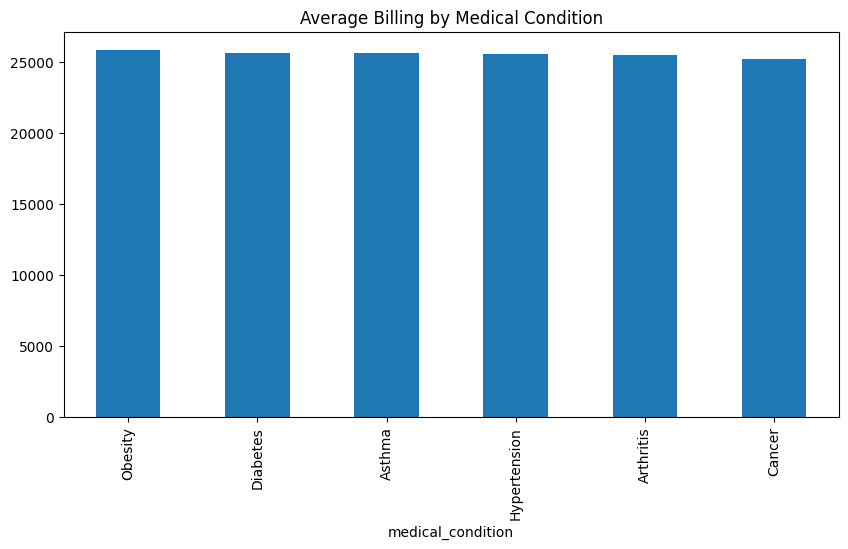

In [42]:
billing_by_condition = df.groupby('medical_condition')['billing_amount'].mean().sort_values(ascending=False)
billing_by_condition.plot(kind='bar', figsize=(10,5), title='Average Billing by Medical Condition')


Text(0.5, 1.0, 'Length of Stay Distribution by Admission Type')

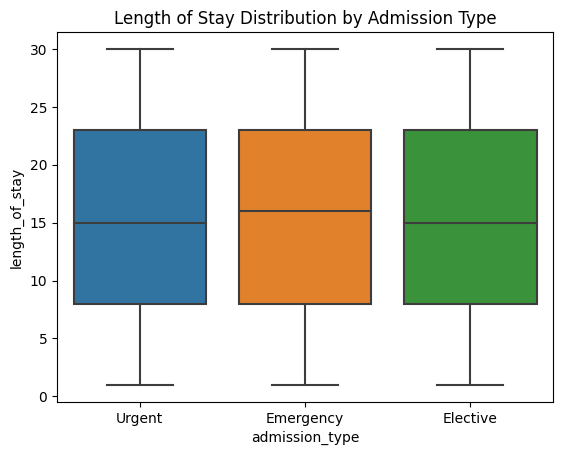

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='admission_type', y='length_of_stay', data=df)
plt.title('Length of Stay Distribution by Admission Type')


<Axes: title={'center': 'Feature Importance for Billing Amount'}>

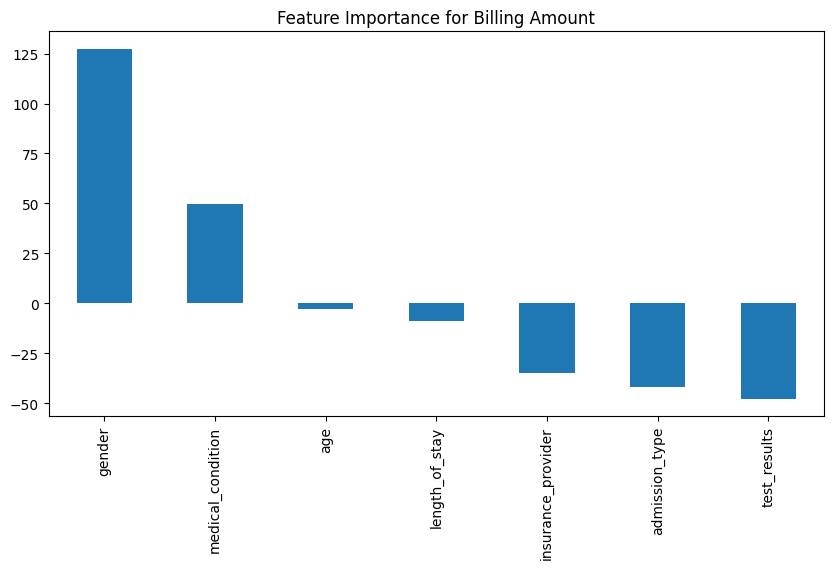

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


encoded_df = df.copy()
for col in ['gender', 'medical_condition', 'admission_type', 'insurance_provider', 'test_results']:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

X = encoded_df[['age', 'length_of_stay', 'gender', 'medical_condition', 'admission_type', 'insurance_provider', 'test_results']]
y = encoded_df['billing_amount']

model = LinearRegression()
model.fit(X, y)

importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
importance.plot(kind='bar', figsize=(10,5), title='Feature Importance for Billing Amount')


<Axes: title={'center': 'Monthly Admissions Trend'}, xlabel='month'>

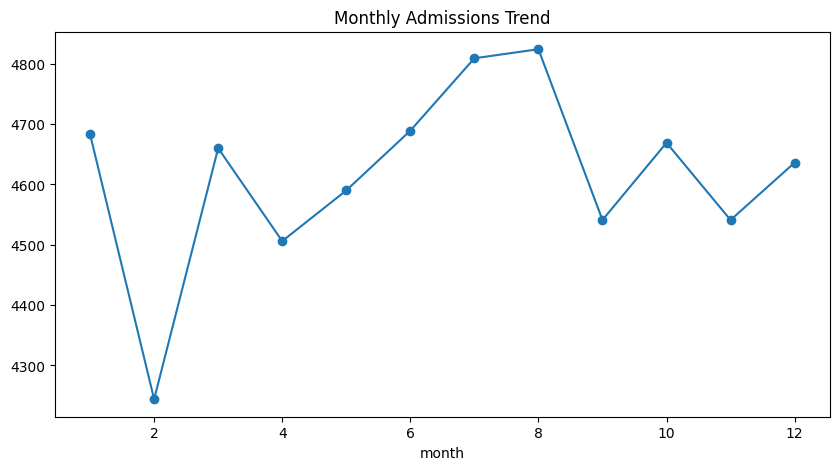

In [45]:
df['month'] = df['date_of_admission'].dt.month
monthly_admissions = df.groupby('month').size()

monthly_admissions.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Admissions Trend')


In [49]:
summary = df.groupby(['medical_condition', 'admission_type']).agg({
    'billing_amount': 'mean',
    'length_of_stay': 'mean'
}).reset_index()

summary.to_csv('healthcare_summary.csv', index=False)
df.head()


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,length_of_stay,month
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,1
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,8
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,9
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,11
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,9
